In [116]:
import random
import mph
import numpy as np
import matplotlib.pyplot as plt
import os    
import time
from tqdm.notebook import tqdm
import pickle
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import tensorflow as tf

path = 'D:/Josh/Fall 2021/ML-LWA/partialslotsmodel_forusee.mph'

scattering = [1,2,5,6,7,51,53,56,57]

In [117]:
def start_client(path):
    global model
    global pymodel
    global client
    client = mph.start(version = '5.3a')
    pymodel = client.load(path)
    model = pymodel.java
    
def save_model(path):
    model.save(path)
    
def generate_image(random_pattern):
    adjusted = [x - 15 for x in random_pattern]
    out = np.flip(np.array([1 if x in adjusted else 0 for x in np.arange(36)]))
    return out
    
# def simulate_random():
#     global start_count
# #     grids_of_interest = [random.randint(15,50) for i in range(0,random.randint(1,36))]
# #     grids_of_interest = [random.randint(15,50) for i in range(0,18)]
#     grids_of_interest = random.sample(range(15,51),18)
#     this_scattering = scattering + grids_of_interest
    
#     model.physics("emw").feature("sctr1").selection().set(this_scattering);
#     model.physics("emw").feature("ffd1").feature("ffc1").selection().set(grids_of_interest);

#     model.geom("geom1").runAll();
#     model.mesh().run();
#     model.sol("sol1").runAll();
    
#     model.result("pg4").set("data", 'dset1')
#     model.result("pg4").feature("ff1").run()
#     model.result().export("plot1").set("filename", save_str + '.csv')
#     model.result().export("plot1").set("plotgroup", "pg4")
#     model.result().export("plot1").set("plot", "ff1")
    
#     model.result().export("plot1").run()

#     return grids_of_interest

def simulate(vals):
    global start_count
    
    vals = list(vals)
    
    bucket_list = [0, 0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0.875, 1.0]
#     bucket_list = [0, 0.5, 1.0]
    
    buckets = []
    
    for out_index,bucket in enumerate(bucket_list):
        if out_index == 0:
            pass
        else:
            buckets.append([index + 15 for index,slot in enumerate(vals) if ((slot <= bucket) & (slot > bucket_list[out_index-1]))])
    
    this_scattering = scattering
    
    model.physics("emw").feature("sctr1").selection().set(this_scattering);
    
    for i in np.arange(0,8):
        model.physics("emw").feature("imp" + str(i + 1)).selection().set(buckets[i]);

    model.geom("geom1").runAll();
    model.mesh().run();
    model.sol("sol1").runAll();
    
    model.result("pg4").set("data", 'dset1')
    model.result("pg4").feature("ff1").run()
    model.result().export("plot1").set("filename", save_str + '.csv')
    model.result().export("plot1").set("plotgroup", "pg4")
    model.result().export("plot1").set("plot", "ff1")
    
    model.result().export("plot1").run()


<h1>Please don't close out of this, very long simulation in progress! Using the computer is fine just don't close this window, thanks!</h1>

<h4>Light simulations should work fine but if you need to do anything heavy, click Kernel in the toolbar above and just hit shutdown, just shoot me (Josh) an email if you need to do that.</h4>

In [ ]:
for instance in tqdm(np.arange(10)):
    img_list = []

    save_str = 'C:/Users/THzAbacus/Documents/Josh/LeakyWaveML/comsol_results/1dconstantslots/' + str(int(time.time()))

    start_client(path)
    start_time = time.time()
    for i in tqdm(np.arange(500)):
        goi = simulate_random()
        array = generate_image(goi)
        img_list.append(array)

    print(time.time() - start_time, 'seconds')

    with open(save_str + '.pkl', 'wb') as file:
        pickle.dump(img_list, file)

In [150]:
model.save('D:/Josh/Fall 2021/ML-LWA/check1d3.mph')

In [118]:
with open('1d/peaks_to_slot/constant_power/results/test_data.pkl', 'rb') as pkl_file:
    slots, true, preds = pickle.load(pkl_file)

In [119]:
# img_list = []

save_str = 'C:/Users/THzAbacus/Documents/Josh/LeakyWaveML/comsol_results/grey'

start_client(path)
start_time = time.time()
for i in tqdm(np.arange(500)):
    
#     assump = list(np.where(np.flip(preds[i]))[0] + 15)

#     naive = list(np.where(np.flip(tf.round(prediction[i])))[0] + 15)
    
    goi = simulate(np.flip(preds[i]))
#     array = generate_image(goi)
#     img_list.append(array)
    
#     goi = simulate(naive)
#     array = generate_image(goi)
#     img_list.append(array)

print(time.time() - start_time, 'seconds')

# with open(save_str + '.pkl', 'wb') as file:
#     pickle.dump(img_list, file)

  0%|          | 0/500 [00:00<?, ?it/s]

18706.88891196251 seconds


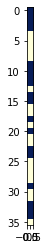

In [78]:
plt.imshow(tf.expand_dims(true[1],1),cmap='YlGnBu')

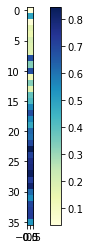

In [110]:
plt.imshow(tf.expand_dims(preds[0],1),cmap='YlGnBu')
plt.colorbar()

In [108]:
np.flip(preds[0])[35]

<tf.Tensor: shape=(), dtype=float32, numpy=0.036886454>

In [98]:
# start_client(path)
simulate(np.flip(preds[0]))
# save_model('D:/Josh/Fall 2021/ML-LWA/partialslotsmodel_test2.mph')

[[39, 48, 50], [37, 43, 44, 45, 46, 47], [38, 41], [31, 35, 36, 49], [15, 19, 20, 29, 30, 32, 34], [16, 17, 18, 22, 26, 28, 33, 40, 42], [21, 23, 24, 25, 27], []]
